In [2]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [5]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 13s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [6]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size


In [10]:
r = model.fit(train_generator, validation_data=(x_test,y_test), steps_per_epoch=steps_per_epoch, epochs=25)

Epoch 1/25
1562/1562 [==============================] - 27s 17ms/step - loss: 1.5984 - accuracy: 0.4322 - val_loss: 1.3725 - val_accuracy: 0.5239
Epoch 2/25
1562/1562 [==============================] - 27s 17ms/step - loss: 1.1686 - accuracy: 0.5866 - val_loss: 1.1160 - val_accuracy: 0.6186
Epoch 3/25
1562/1562 [==============================] - 27s 17ms/step - loss: 1.0001 - accuracy: 0.6518 - val_loss: 1.1358 - val_accuracy: 0.6263
Epoch 4/25
1562/1562 [==============================] - 27s 17ms/step - loss: 0.8894 - accuracy: 0.6921 - val_loss: 0.8096 - val_accuracy: 0.7300
Epoch 5/25
1562/1562 [==============================] - 27s 18ms/step - loss: 0.8120 - accuracy: 0.7189 - val_loss: 0.8106 - val_accuracy: 0.7222
Epoch 6/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7576 - accuracy: 0.7414 - val_loss: 0.7644 - val_accuracy: 0.7412
Epoch 7/25
1562/1562 [==============================] - 27s 18ms/step - loss: 0.7042 - accuracy: 0.7602 - val_loss: 0.7903 -

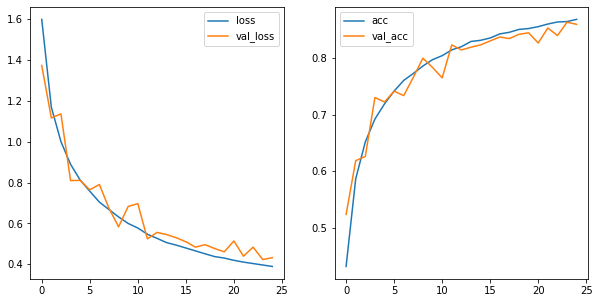

In [27]:
# Plot loss per iteration
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.plot(r.history['loss'], label='loss')
ax1.plot(r.history['val_loss'], label='val_loss')
ax1.legend()
# Plot accuracy per iteration
ax2.plot(r.history['accuracy'], label='acc')
ax2.plot(r.history['val_accuracy'], label='val_acc')
ax2.legend();


Confusion matrix, without normalization
[[839   8  34  18  14   1   5   2  33  46]
 [  4 948   1   0   0   0   2   0   3  42]
 [ 31   2 812  26  54  18  45   3   3   6]
 [ 13   3  34 757  40  48  60  16  11  18]
 [  5   1  24  26 891   4  40   8   1   0]
 [  4   1  35 138  43 718  34  15   1  11]
 [  5   3  20  19  10   4 932   2   3   2]
 [ 10   1  16  36  57  24  12 833   2   9]
 [ 36   6   8   6   3   0   7   1 904  29]
 [  5  30   1   2   1   0   0   0   5 956]]


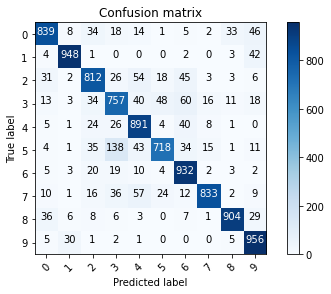

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)));



In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

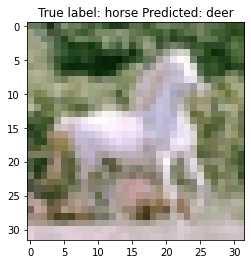

In [31]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [30]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 